In [2]:
import numpy as numpy
import pandas as pd
import os
import matplotlib.pyplot as plt
# import eli5.sklearn import PermutationImportance

In [182]:
metrics = pd.read_csv('Experiment_Trials/eeg_eye_state/MAR_Experiment_2023-04-02 23:16:14.052298/MAR/results/metrics_0.csv',index_col=0)
errors = pd.read_csv('Experiment_Trials/eeg_eye_state/MAR_Experiment_2023-04-02 23:16:14.052298/MAR/results/errors_0.csv',index_col=0)
distance =pd.read_csv('Experiment_Trials/eeg_eye_state/MAR_Experiment_2023-04-02 23:16:14.052298/MAR/results/distances_0.csv',index_col=0)
weights_top = pd.read_csv('Experiment_Trials/eeg_eye_state/MAR_Experiment_2023-04-02 23:16:14.052298/MAR/results/weights_top_None_0.csv',index_col=0)

print(f'shape of error {errors.shape}')
print(f'shape of distance{distance.shape}')
# distance.head()
print(f'shape of average weight {weights_top.shape}')
# weights_top.head()

shape of error (14980, 13)
shape of distance(14980, 7)
shape of average weight (14980, 8)


In [183]:
metrics.head()#columns are baseline classifiers and ensemble classifiers

,Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'sklearn.linear_model._bayes.BayesianRidge'>)),Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'xgboost.sklearn.XGBRegressor'>)),Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'sklearn.ensemble._forest.RandomForestRegressor'>)),Estim(XGBClassifier)_Imputer(KNNImputer),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'sklearn.linear_model._bayes.BayesianRidge'>)),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'xgboost.sklearn.XGBRegressor'>)),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'sklearn.ensemble._forest.RandomForestRegressor'>)),Estim(RandomForestClassifier)_Imputer(KNNImputer),Uniform Model Averaging,<class 'sklearn.ensemble._stacking.StackingClassifier'>,dew_top_1,dew_top_3,dew_top_None
roc_auc,0.896380,0.900700,0.90018,0.893600,0.78376,0.785000,0.789080,0.783960,0.893900,0.897540,0.898000,0.908760,0.898760
accuracy,0.810600,0.813940,0.81690,0.810360,0.71486,0.718400,0.724040,0.713140,0.805800,0.814160,0.813360,0.819620,0.810700
f1_score,0.779753,0.783651,0.78735,0.777989,0.62758,0.631568,0.644402,0.621556,0.763946,0.786994,0.782006,0.788163,0.771204


In [184]:
distance.head()#number of neighbors

,0,1,2,3,4,5,6
0,0.001850,0.001895,0.001970,0.002148,0.002172,0.002304,0.002452
1,0.000929,0.001650,0.001848,0.001919,0.001920,0.002084,0.002221
2,0.002510,0.002975,0.003159,0.003186,0.003206,0.003212,0.003213
3,0.001428,0.001866,0.001968,0.002001,0.002106,0.002159,0.002173
4,0.001936,0.002207,0.002228,0.002295,0.002300,0.002316,0.002337


In [186]:
weights_top.head()

,0,1,2,3,4,5,6,7
0,0.146788,0.160616,0.159060,0.139206,0.083819,0.142872,0.083819,0.083819
1,0.114782,0.136661,0.148309,0.142574,0.107329,0.116408,0.116951,0.116985
2,0.125919,0.127537,0.123187,0.146700,0.118233,0.116449,0.117897,0.124077
3,0.132416,0.129225,0.130719,0.127455,0.119401,0.119340,0.118057,0.123387
4,0.158443,0.150264,0.161153,0.131939,0.128818,0.071937,0.125511,0.071937


# error analysis

In [171]:
errors.head()

,Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'sklearn.linear_model._bayes.BayesianRidge'>)),Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'xgboost.sklearn.XGBRegressor'>)),Estim(XGBClassifier)_Imputer(IterativeImputer(<class 'sklearn.ensemble._forest.RandomForestRegressor'>)),Estim(XGBClassifier)_Imputer(KNNImputer),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'sklearn.linear_model._bayes.BayesianRidge'>)),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'xgboost.sklearn.XGBRegressor'>)),Estim(RandomForestClassifier)_Imputer(IterativeImputer(<class 'sklearn.ensemble._forest.RandomForestRegressor'>)),Estim(RandomForestClassifier)_Imputer(KNNImputer),Uniform Model Averaging,<class 'sklearn.ensemble._stacking.StackingClassifier'>,dew_top_1,dew_top_3,dew_top_None
0,0.042889,0.042367,0.050571,0.146496,0.438780,0.631711,0.523797,0.556920,0.304191,0.038640,0.042367,0.045329,0.259154
1,0.023776,0.018122,0.022679,0.169564,0.405914,0.440373,0.451613,0.446156,0.247275,0.044756,0.022679,0.070205,0.232585
2,0.033454,0.047817,0.015503,0.075325,0.407328,0.415358,0.421745,0.439336,0.231983,0.050370,0.075325,0.053382,0.224033
3,0.105600,0.054539,0.093194,0.106304,0.471914,0.540231,0.482875,0.482542,0.292150,0.040281,0.105600,0.084649,0.284127
4,0.027496,0.021250,0.010162,0.010758,0.336083,0.440610,0.466603,0.516273,0.228654,0.002655,0.010162,0.019553,0.181299


In [109]:
def selecting_UMA__DEW(path):
    errors = pd.read_csv(path,index_col=0)
    
    # columns = ['ByesianRidge_XGBClf','XGBR_XFBClf','RF_XGBClf','KNN_XFBClf','BaysianRidge_RF','XGBR_RF','RF_RF','KNN_RF','UMA','Stack','DEW']
    # print(len(columns))
    new_columns = ['UMA','DEW']
    new_df = errors[['Uniform Model Averaging','dew_top_None']]
    # #rename columns
    new_df.columns = new_columns
    return new_df
ens= selecting_UMA__DEW('Experiment_Trials/eeg_eye_state/MAR_Experiment_2023-04-02 23:16:14.052298/MAR/results/errors_0.csv')
#import datasets from Experiment_Trails
print(ens)

           UMA       DEW
0     0.304191  0.259154
1     0.247275  0.232585
2     0.231983  0.224033
3     0.292150  0.284127
4     0.228654  0.181299
...        ...       ...
2991  0.535406  0.542495
2992  0.465611  0.409077
2993  0.442404  0.429496
2994  0.468341  0.418151
2995  0.505051  0.498229

[14980 rows x 2 columns]


In [100]:
#import datasets from Experiment_Trails
def convert_ds_old(path):
    errors = pd.read_csv(path,index_col=0)
    columns = errors.columns
    
    dropped_cols = columns[:8].tolist()+['dew_top_1','dew_top_3']
    
    # columns = ['ByesianRidge_XGBClf','XGBR_XFBClf','RF_XGBClf','KNN_XFBClf','BaysianRidge_RF','XGBR_RF','RF_RF','KNN_RF','UMA','Stack','DEW']
    # print(len(columns))
    new_columns = ['UMA','Stack','DEW']
    errors_modified = errors.drop(dropped_cols,axis=1)
    # #rename columns
    errors_modified.columns = new_columns
    return errors_modified
    #import datasets from Experiment_Trails


In [101]:
#import datasets from Experiment_Trails
def convert_ds(path):
    errors = pd.read_csv(path,index_col=0)
    columns = errors.columns
    
    dropped_cols = ['Uniform Model Averaging','<class \'sklearn.ensemble._stacking.StackingClassifier\'>','dew_top_1','dew_top_3','dew_top_None']
    
    # columns = ['ByesianRidge_XGBClf','XGBR_XFBClf','RF_XGBClf','KNN_XFBClf','BaysianRidge_RF','XGBR_RF','RF_RF','KNN_RF','UMA','Stack','DEW']
    # print(len(columns))
    new_columns = ['ByesianRidge_XGBClf','XGBR_XFBClf','RF_XGBClf','KNN_XFBClf','BaysianRidge_RF','XGBR_RF','RF_RF','KNN_RF']
    errors_modified = errors.drop(dropped_cols,axis=1)
    # #rename columns
    errors_modified.columns = new_columns
    return errors_modified
    #import datasets from Experiment_Trails


In [233]:
def convert_ds_new(path):
    errors = pd.read_csv(path,index_col=0)
    columns = errors.columns
    
    # dropped_cols = columns[:8].tolist()+['dew_top_1','dew_top_3']
    dropped_cols = ['Uniform Model Averaging','<class \'sklearn.ensemble._stacking.StackingClassifier\'>','dew_top_1','dew_top_3','dew_top_None']
    # columns = ['ByesianRidge_XGBClf','XGBR_XFBClf','RF_XGBClf','KNN_XFBClf','BaysianRidge_RF','XGBR_RF','RF_RF','KNN_RF','UMA','Stack','DEW']
    # print(len(columns))
    ensemble_models = errors[['Uniform Model Averaging','dew_top_None']]

    base_models= ['BayesianRidge_XGBClf','XGBR_XFBClf','RF_XGBClf','KNN_XFBClf','BayesianRidge_RF','XGBR_RF','RF_RF','KNN_RF']

    errors_base_models = errors.drop(dropped_cols,axis=1)
    # #rename columns
    errors_base_models.columns = base_models
    
    # return errors_base_models, ensemble_models
    #import datasets from Experiment_Trails
    # Calculate the average mean for each column
    average_base_model_medians = errors_base_models.median()

    # Create a new dataframe to store the average medians and index as the column names
    average_base_model_medians_df = pd.DataFrame({'Average median': average_base_model_medians.values}, index=average_base_model_medians.index)

    average_ensemble_model_medians = ensemble_models.median()
    average_ensemble_model_medians_df = pd.DataFrame({'Average median': average_ensemble_model_medians.values}, index=average_ensemble_model_medians.index)
    #concat two dataframes
    final_df = pd.concat([average_base_model_medians_df,average_ensemble_model_medians_df])
    final_df_transposed = final_df.transpose()
    #remove the index name
    final_df_transposed.index.name = None

    return final_df_transposed.to_numpy()



In [235]:
ens= convert_ds_new('Experiment_Trials/eeg_eye_state/MAR_Experiment_2023-04-02 23:16:14.052298/MAR/results/errors_0.csv')
#import datasets from Experiment_Trails
print(ens)

[[0.22816071 0.22597357 0.22843875 0.23799174 0.42632406 0.42289131
  0.4247938  0.42368031 0.33222068 0.32142735]]


In [ ]:
for dataset in datasets:
    base_path = 'Experiment_Trials/'+dataset+'/'

    missing_type = ['MAR','MCAR','MNAR']
    # Loop through each main experiment type directory
    for exp_type_dir in os.listdir(base_path):
        # Construct the path to the experiment type directory
        exp_type_path = os.path.join(base_path, exp_type_dir)
        # print(exp_type_path)
        if os.path.isdir(exp_type_path):
            # Now loop through each timestamped directory within the experiment type directory
            for timestamp_dir in os.listdir(exp_type_path):
                # Construct the path to the timestamped directory
                timestamp_path = os.path.join(exp_type_path, timestamp_dir)
                if os.path.isdir(timestamp_path) and timestamp_dir.startswith(('MAR','MCAR','MNAR')):
                    # Construct the path to the errors_0.csv file
                    errors_file_path = os.path.join(timestamp_path, 'results', 'errors_0.csv')
                    if os.path.exists(errors_file_path):
                        # Read the errors into a dataframe
                        errors_df = convert_ds(errors_file_path)
                        # Plot the boxplot for the errors
                        plt.figure(figsize=(12, 8))
                        errors_df.boxplot()
                        plt.xticks(rotation=60)
                        plt.title(f"{timestamp_dir} Error Distribution per Classifier")
                    
                        sub_dir = dataset

                        if not os.path.exists('output/'+sub_dir):
                            os.makedirs('output/'+sub_dir)
                            
                        plt.savefig('output/'+sub_dir+'/'+timestamp_dir+'_error.png')
                        
                        # Construct the path to the distances_0.csv file


,ByesianRidge_XGBClf,XGBR_XFBClf,RF_XGBClf,KNN_XFBClf,BaysianRidge_RF,XGBR_RF,RF_RF,KNN_RF,UMA,Stack,DEW
0,0.042889,0.042367,0.050571,0.146496,0.438780,0.631711,0.523797,0.556920,0.304191,0.038640,0.259154
1,0.023776,0.018122,0.022679,0.169564,0.405914,0.440373,0.451613,0.446156,0.247275,0.044756,0.232585
2,0.033454,0.047817,0.015503,0.075325,0.407328,0.415358,0.421745,0.439336,0.231983,0.050370,0.224033
3,0.105600,0.054539,0.093194,0.106304,0.471914,0.540231,0.482875,0.482542,0.292150,0.040281,0.284127
4,0.027496,0.021250,0.010162,0.010758,0.336083,0.440610,0.466603,0.516273,0.228654,0.002655,0.181299


In [10]:
eeg_data = pd.read_csv('data/eeg_eye_state.csv', header=None)
eeg_data.head()
#check if there is categorical data
eeg_data.dtypes
#che# prcnt(root,dirs,kiles)
    if if there is missi1] in datasets:
        d = root.split("/")[-1]
        for root, dirs, files in os.walk("Experiment_Trials"):
            if root.split("/")[-ng data
        # eeg_data.isnull().sum()
      print(ee  g_data.shape)                                        le

(14980, 15)


In [73]:
errors_modified.head()

NameError: name 'errors_modified' is not defined

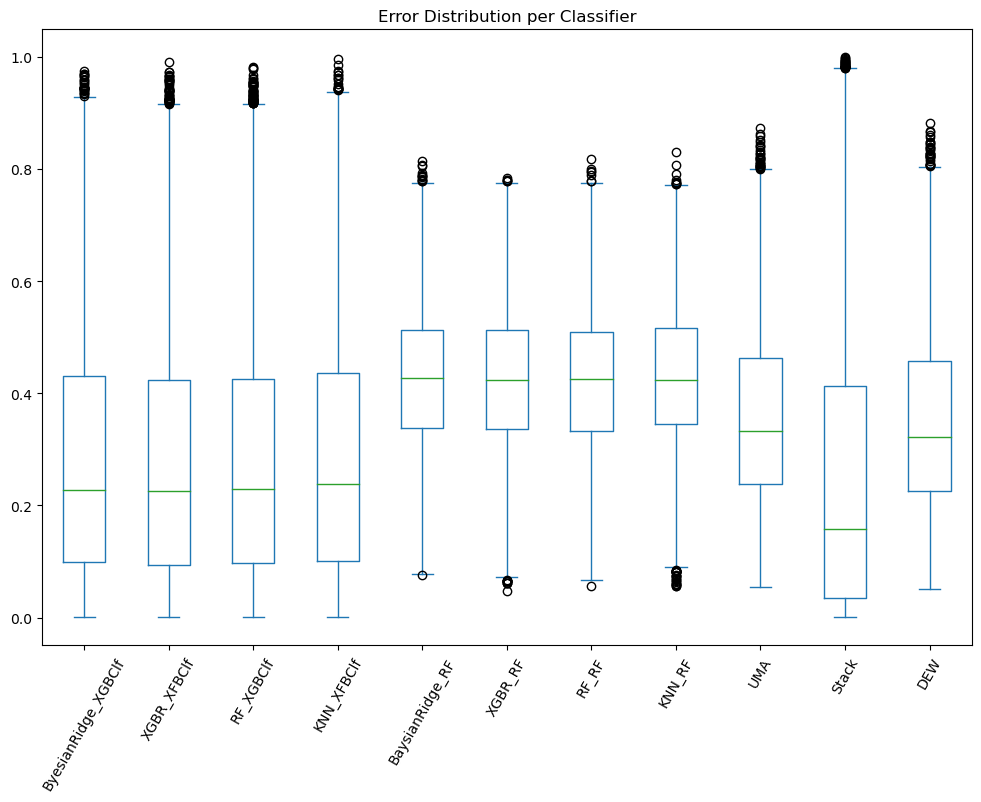

In [65]:
# plot error distribution
errors_modified.plot(kind='box', figsize=(12, 8))
plt.xticks(rotation=60)  # Rotate x-axis tick labels
plt.title("Error Distribution per Classifier")
plt.show()

In [55]:
mean_errors = errors_modified.mean()
max_error_classifier = mean_errors.idxmax()
min_error_classifier = mean_errors.idxmin()
print(f"Classifier with highest average error: {max_error_classifier}, Error: {mean_errors[max_error_classifier]}")
print(f"Classifier with lowest average error: {min_error_classifier}, Error: {mean_errors[min_error_classifier]}")


Classifier with highest average error: KNN_RF, Error: 0.43295616537686876
Classifier with lowest average error: Stack, Error: 0.2517474409822846


In [57]:
import seaborn as sns

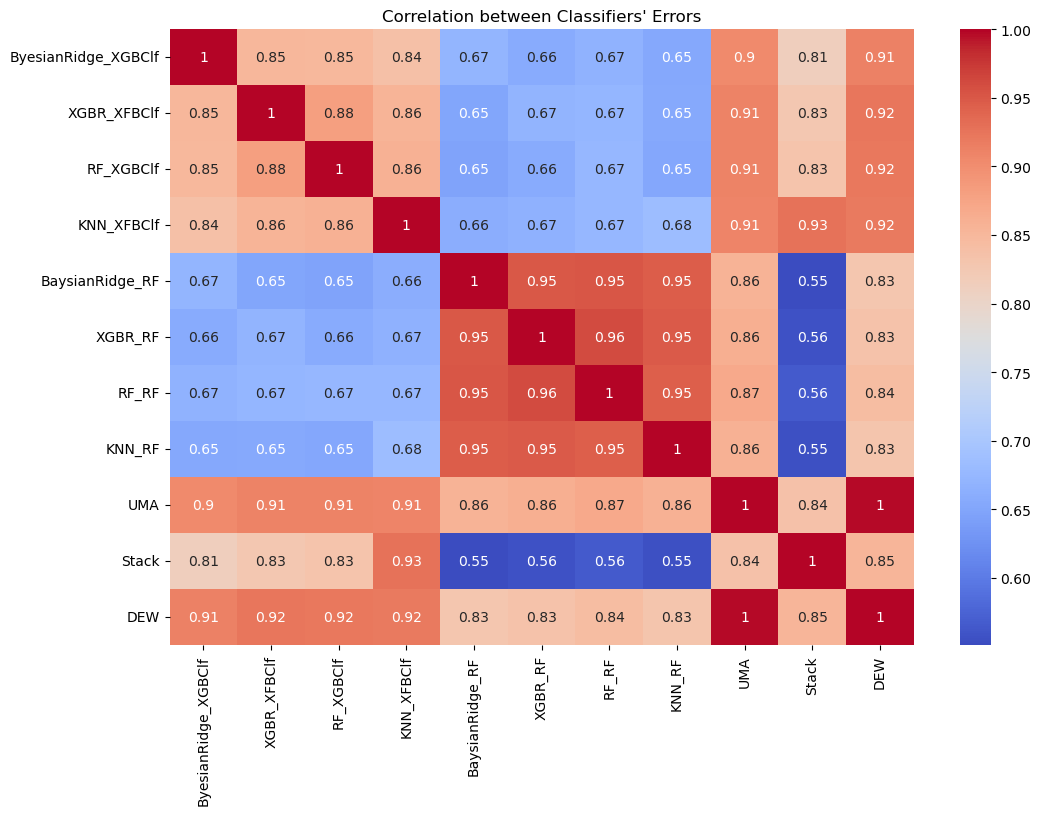

In [58]:
correlation_matrix = errors_modified.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Classifiers' Errors")
plt.show()

In [ ]:
for dataset in datasets:
    base_path = 'Experiment_Trials/'+dataset+'/'

    missing_type = ['MAR','MCAR','MNAR']
    # Loop through each main experiment type directory
    for exp_type_dir in os.listdir(base_path):
        # Construct the path to the experiment type directory
        exp_type_path = os.path.join(base_path, exp_type_dir)
        # print(exp_type_path)
        if os.path.isdir(exp_type_path):
            # Now loop through each timestamped directory within the experiment type directory
            for timestamp_dir in os.listdir(exp_type_path):
                # Construct the path to the timestamped directory
                timestamp_path = os.path.join(exp_type_path, timestamp_dir)
                if os.path.isdir(timestamp_path) and timestamp_dir.startswith(('MAR','MCAR','MNAR')):
                    # Construct the path to the errors_0.csv file
                    errors_file_path = os.path.join(timestamp_path, 'results', 'errors_0.csv')
                    if os.path.exists(errors_file_path):
                        # Read the errors into a dataframe
                        errors_df = convert_ds(errors_file_path)
                        correlation_matrix = errors_df.corr()
                        # Plot the boxplot for the errors
                        plt.figure(figsize=(12, 8))
                        plt.figure(figsize=(12, 8))
                        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
                        plt.title("Correlation between Classifiers' Errors")
                        
 
                        sub_dir = dataset

                        if not os.path.exists('output/'+sub_dir+'/correlation'):
                            os.makedirs('output/'+sub_dir+'/correlation')
                            
                        plt.savefig('output/'+sub_dir+'/correlation/'+timestamp_dir+'_corr_mx.png')
                        
                        # Construct the path to the distances_0.csv file


In [1]:
import sys
sys.path.append('/Users/nanspro/repos/dew_2024/src')
import data_loaders as dl

# Load the eeg_eye_state dataset wihtout missingness
eeg_dl = dl.DataLoadersEnum
eeg_dt = eeg_dl.prepare_eeg_eye_data('data/eeg_eye_state.csv')


In [28]:
eeg_dt.data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [3]:

eeg_miss = dl.MissDataset(data=eeg_dt.data,target_col=eeg_dt.target_col,n_folds=5)  
#verify missing percentage is 0.1
eeg_miss.data.isna().sum().sum()/(eeg_miss.data.shape[0]*eeg_miss.data.shape[1])
#splitting dataset
eeg_miss.split_dataset()

In [ ]:
#function of training 

In [4]:
first_fold_train, first_fold_val, first_fold_test = eeg_miss.train_val_test_triples[0]
print(first_fold_train.shape, first_fold_val.shape,first_fold_test.shape)

first_train_indices, first_val_indices, first_test_indices = eeg_miss.train_val_test_triples[0]
target = eeg_miss.target_col
# To get the actual data:
first_fold_train_data = eeg_miss.data.iloc[first_train_indices]
# print(eeg_miss.data[target])
first_fold_train_targets = eeg_miss.data[target].iloc[first_train_indices]

first_fold_val_data = eeg_miss.data.iloc[first_val_indices]
first_fold_val_targets = eeg_miss.data[target].iloc[first_val_indices]

first_fold_test_data = eeg_miss.data.iloc[first_test_indices]
first_fold_test_targets = eeg_miss.data[target].iloc[first_test_indices]

(5992,) (5992,) (2996,)


In [13]:
#permutation importance 
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier
perm = PermutationImportance(RandomForestClassifier(n_estimators=100,max_depth=5), random_state=1).fit(first_fold_train_data, first_fold_train_targets)
eli5.show_weights(perm, feature_names = first_fold_train_data.columns.tolist())

ModuleNotFoundError: No module named 'eli5'

In [5]:
#simple implementation 
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import BayesianRidge
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
import tqdm

my_imputer = KNNImputer()
#using tdqm to track progress
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(first_fold_train_data))
imputed_X_val = pd.DataFrame(my_imputer.transform(first_fold_val_data))

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(imputed_X_train, first_fold_train_targets)
# Get predictions
# predictions = model.predict(imputed_X_val)
# print(predictions)
predict_proba = model.predict_proba(imputed_X_val)


/Users/nanspro/anaconda3/envs/dynamime/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [6]:
# Calculate MAE
mae = mean_absolute_error(first_fold_val_targets, predict_proba[:,1])
print("Mean Absolute Error:" , mae)

Mean Absolute Error: 0.15257156330019256


In [7]:
original_eeg_train_data = eeg_dt.data.iloc[first_train_indices]
original_eeg_val_data = eeg_dt.data.iloc[first_val_indices]
original_eeg_test_data = eeg_dt.data.iloc[first_test_indices]

#classifier
model_orig=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model_orig.fit(original_eeg_train_data, first_fold_train_targets)
predict_proba_orig = model_orig.predict_proba(original_eeg_val_data)
mae_orig = mean_absolute_error(first_fold_val_targets, predict_proba_orig[:,1])
print("Mean Absolute Error:" , mae_orig)

Mean Absolute Error: 0.16532369443904887


In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=100,learning_rate=0.05)
xgb_model.fit(imputed_X_train, first_fold_train_targets, early_stopping_rounds=5, eval_set=[(imputed_X_val, first_fold_val_targets)], verbose=False)
predictions_1=xgb_model.predict(imputed_X_val)
mae_xgb = mean_absolute_error(first_fold_val_targets, predictions_1)
print("Mean Absolute Error:" , mae_xgb)

In [71]:
import numpy as np
# import sklearn.mean_absolute_error as mae
def evaluate_model(model, orig_data, train_val_test_triples, imputer=False): 
    fold_results = []
    target = orig_data.target_col
    # X_train = pd.DataFrame()
    # X_val = pd.DataFrame()
    # y_train = pd.DataFrame()
    # y_val = pd.DataFrame()
    train_val_test_triples = np.array(train_val_test_triples)  # Convert to numpy array
    if imputer:
        my_imputer = KNNImputer(n_neighbors=5)
        #using tdqm to track progress
        for i in range(len(train_val_test_triples)):
            train_index, val_index, test_index = train_val_test_triples[i]
            train_index = np.ravel(train_index)  # Flatten train_index
            val_index = np.ravel(val_index)  # Flatten val_index
        # print(len(train_index), len(val_index), len(test_index))
            X_train, X_val = orig_data.data.iloc[train_index], orig_data.data.iloc[val_index]
            y_train, y_val = orig_data.data[target].iloc[train_index], orig_data.data[target].iloc[val_index]
        
            imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
            imputed_X_val = pd.DataFrame(my_imputer.transform(X_val))
            model.fit(imputed_X_train, y_train)
            
            predict_proba = model.predict_proba(imputed_X_val)
            mae = mean_absolute_error(y_val, predict_proba[:,1])
            fold_results.append(mae)
    else:
        
        for i in range(len(train_val_test_triples)):
            train_index, val_index, test_index = train_val_test_triples[i]
            train_index = np.ravel(train_index)  # Flatten train_index
            val_index = np.ravel(val_index)  # Flatten val_index
        # print(len(train_index), len(val_index), len(test_index))
            X_train, X_val = orig_data.data.iloc[train_index], orig_data.data.iloc[val_index]
            y_train, y_val = orig_data.data[target].iloc[train_index], orig_data.data[target].iloc[val_index]
        
             # Fit the model
            model.fit(X_train, y_train)

            # Predict on validation set
            predictions = model.predict_proba(X_val)

            # Evaluate the model
            loss_val = mean_absolute_error(y_val, predictions[:,1])
            fold_results.append(loss_val)
    return np.mean(fold_results), np.std(fold_results)

In [72]:
train_val_test_triples = eeg_miss.train_val_test_triples
print(f'original loss with KNNimputer&RandomForestClassifier {evaluate_model(model, eeg_dt, train_val_test_triples)}')
print(f'data with missingness with KNNimputer&RandomForestClassifier {evaluate_model(model_orig, eeg_miss, train_val_test_triples,imputer=True)}')

/var/folders/cw/n3c11rb162191jttykhpd_d00000gn/T/ipykernel_13386/940491367.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_val_test_triples = np.array(train_val_test_triples)  # Convert to numpy array


original loss with KNNimputer&RandomForestClassifier (0.16187616133682628, 0.005378155934502757)


/var/folders/cw/n3c11rb162191jttykhpd_d00000gn/T/ipykernel_13386/940491367.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_val_test_triples = np.array(train_val_test_triples)  # Convert to numpy array


data with missingness with KNNimputer&RandomForestClassifier (0.16013010960287385, 0.00909469431641277)


In [19]:
datasets = {'eeg_eye_state','diabetes_vcu','diabetic_retinopathy_final','myocardial_infarction','wisconsin_bc_diagnosis','wisconsin_bc_prognosis'}

In [ ]:
base_path = 'Experiment_Trials/'
for e in os.listdir(base_path):
    print(e)



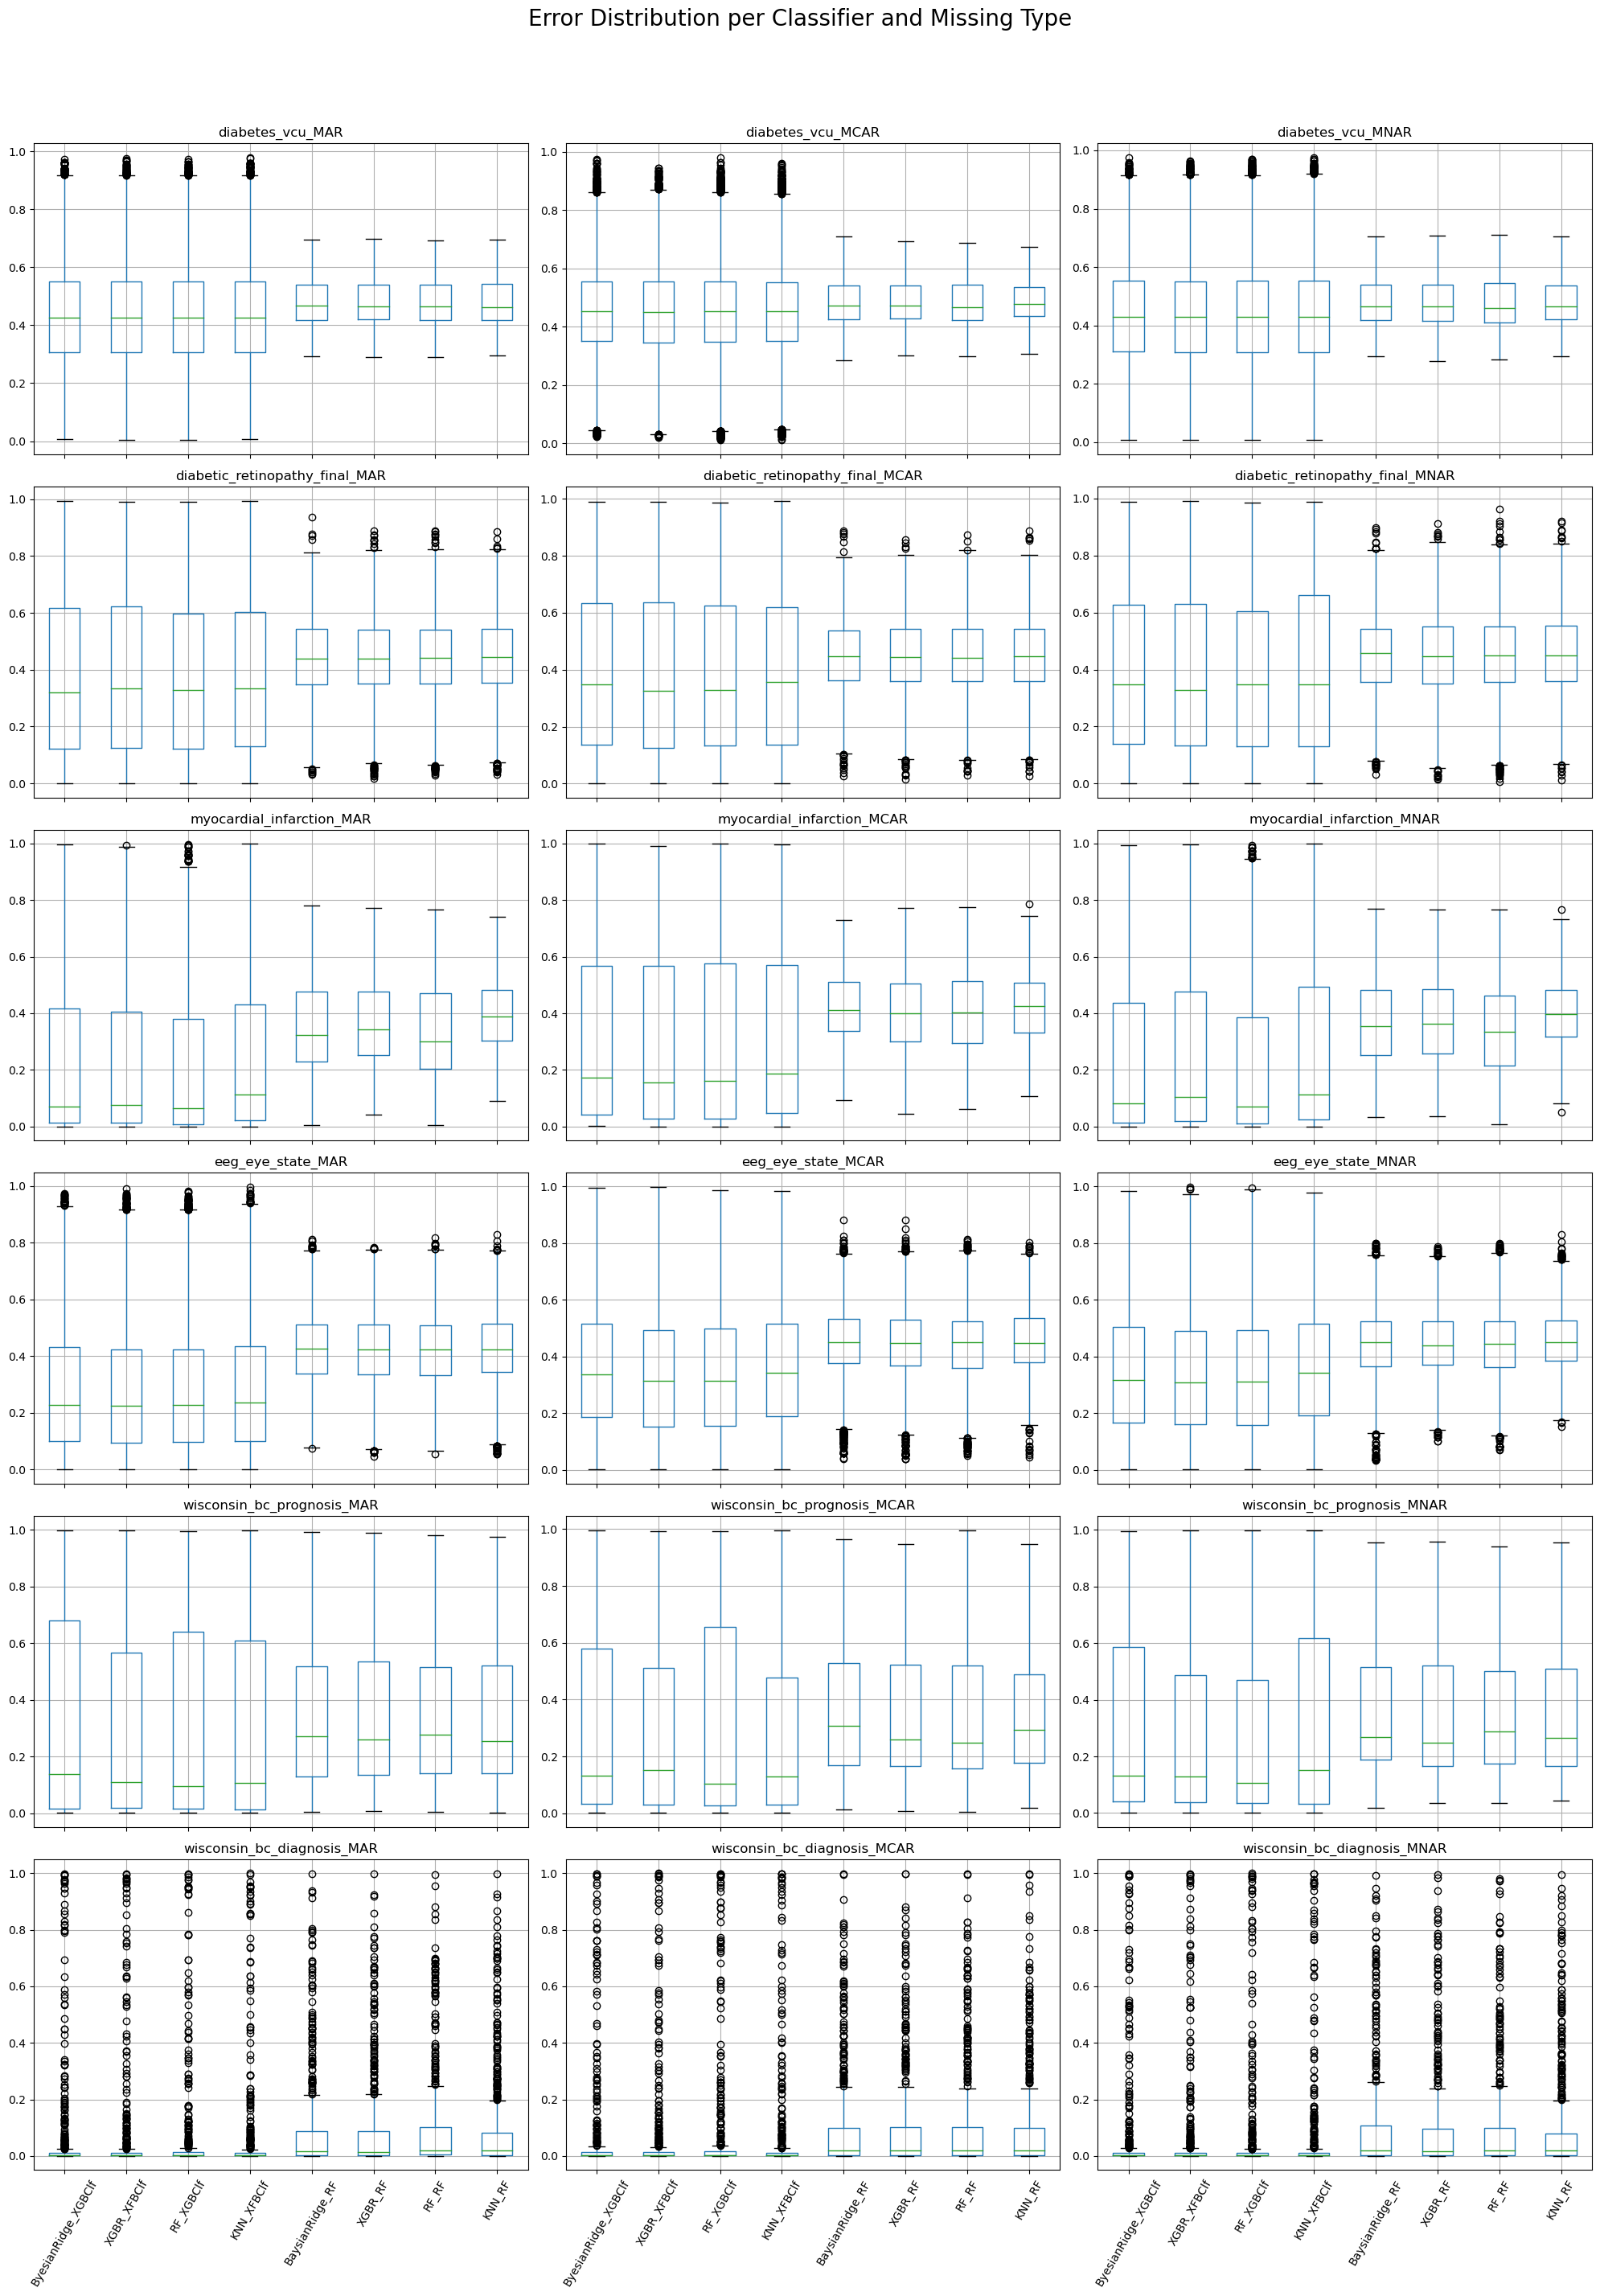

In [107]:
n_rows = len(datasets)
n_cols = 3
missing_types = ['MAR','MCAR','MNAR']
#Create a figure with subplots. Each dataset will have a row, and each missing type will have a column.
fig, axs = plt.subplots(len(datasets), len(missing_types), figsize=(20, 5 * len(datasets)))

# plt.figure(figsize=(24,16))
for idx, dataset in enumerate(datasets):
    
    base_path = 'Experiment_Trials/'+dataset+'/'
    # Loop through each main experiment type directory
    for exp_type_dir in os.listdir(base_path):
        # Construct the path to the experiment type directory
        exp_type_path = os.path.join(base_path, exp_type_dir)
        # print(exp_type_path)
        if os.path.isdir(exp_type_path):
            # Now loop through each timestamped directory within the experiment type directory
            for timestamp_dir in os.listdir(exp_type_path):
                # Construct the path to the timestamped directory
                timestamp_path = os.path.join(exp_type_path, timestamp_dir)

                if os.path.isdir(timestamp_path) and timestamp_dir.startswith(('MAR','MCAR','MNAR')):
                    # Construct the path to the errors_0.csv file
                    errors_file_path = os.path.join(timestamp_path, 'results', 'errors_0.csv')
                    if os.path.exists(errors_file_path):
                        # Read the errors into a dataframe
                        errors_df = convert_ds(errors_file_path)
                        # print(errors_df)
                        # Plot the boxplot for the errors                    
                        exp_type_str = exp_type_dir.split("_")[0]
                        ax = plt.subplot(n_rows, n_cols, idx * n_cols + missing_types.index(exp_type_str) + 1)
                        errors_df.boxplot(ax = ax)
                        ax.set_title(f"{dataset}_{exp_type_str}")
                        if idx < n_rows - 1:  # Disable x-axis labels for all but the last row
                            ax.set_xticklabels([])
                            ax.set_xlabel('')
                        else:
                            ax.set_xticklabels(['ByesianRidge_XGBClf','XGBR_XFBClf','RF_XGBClf','KNN_XFBClf','BaysianRidge_RF','XGBR_RF','RF_RF','KNN_RF'],rotation=60)


# Adjust the layout.

# # Set overall figure title
plt.suptitle('Error Distribution per Classifier and Missing Type',fontsize=20)

# # Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# # Show the plot
plt.show()
    
    

In [214]:
import seaborn as sns
import matplotlib.lines as mlines

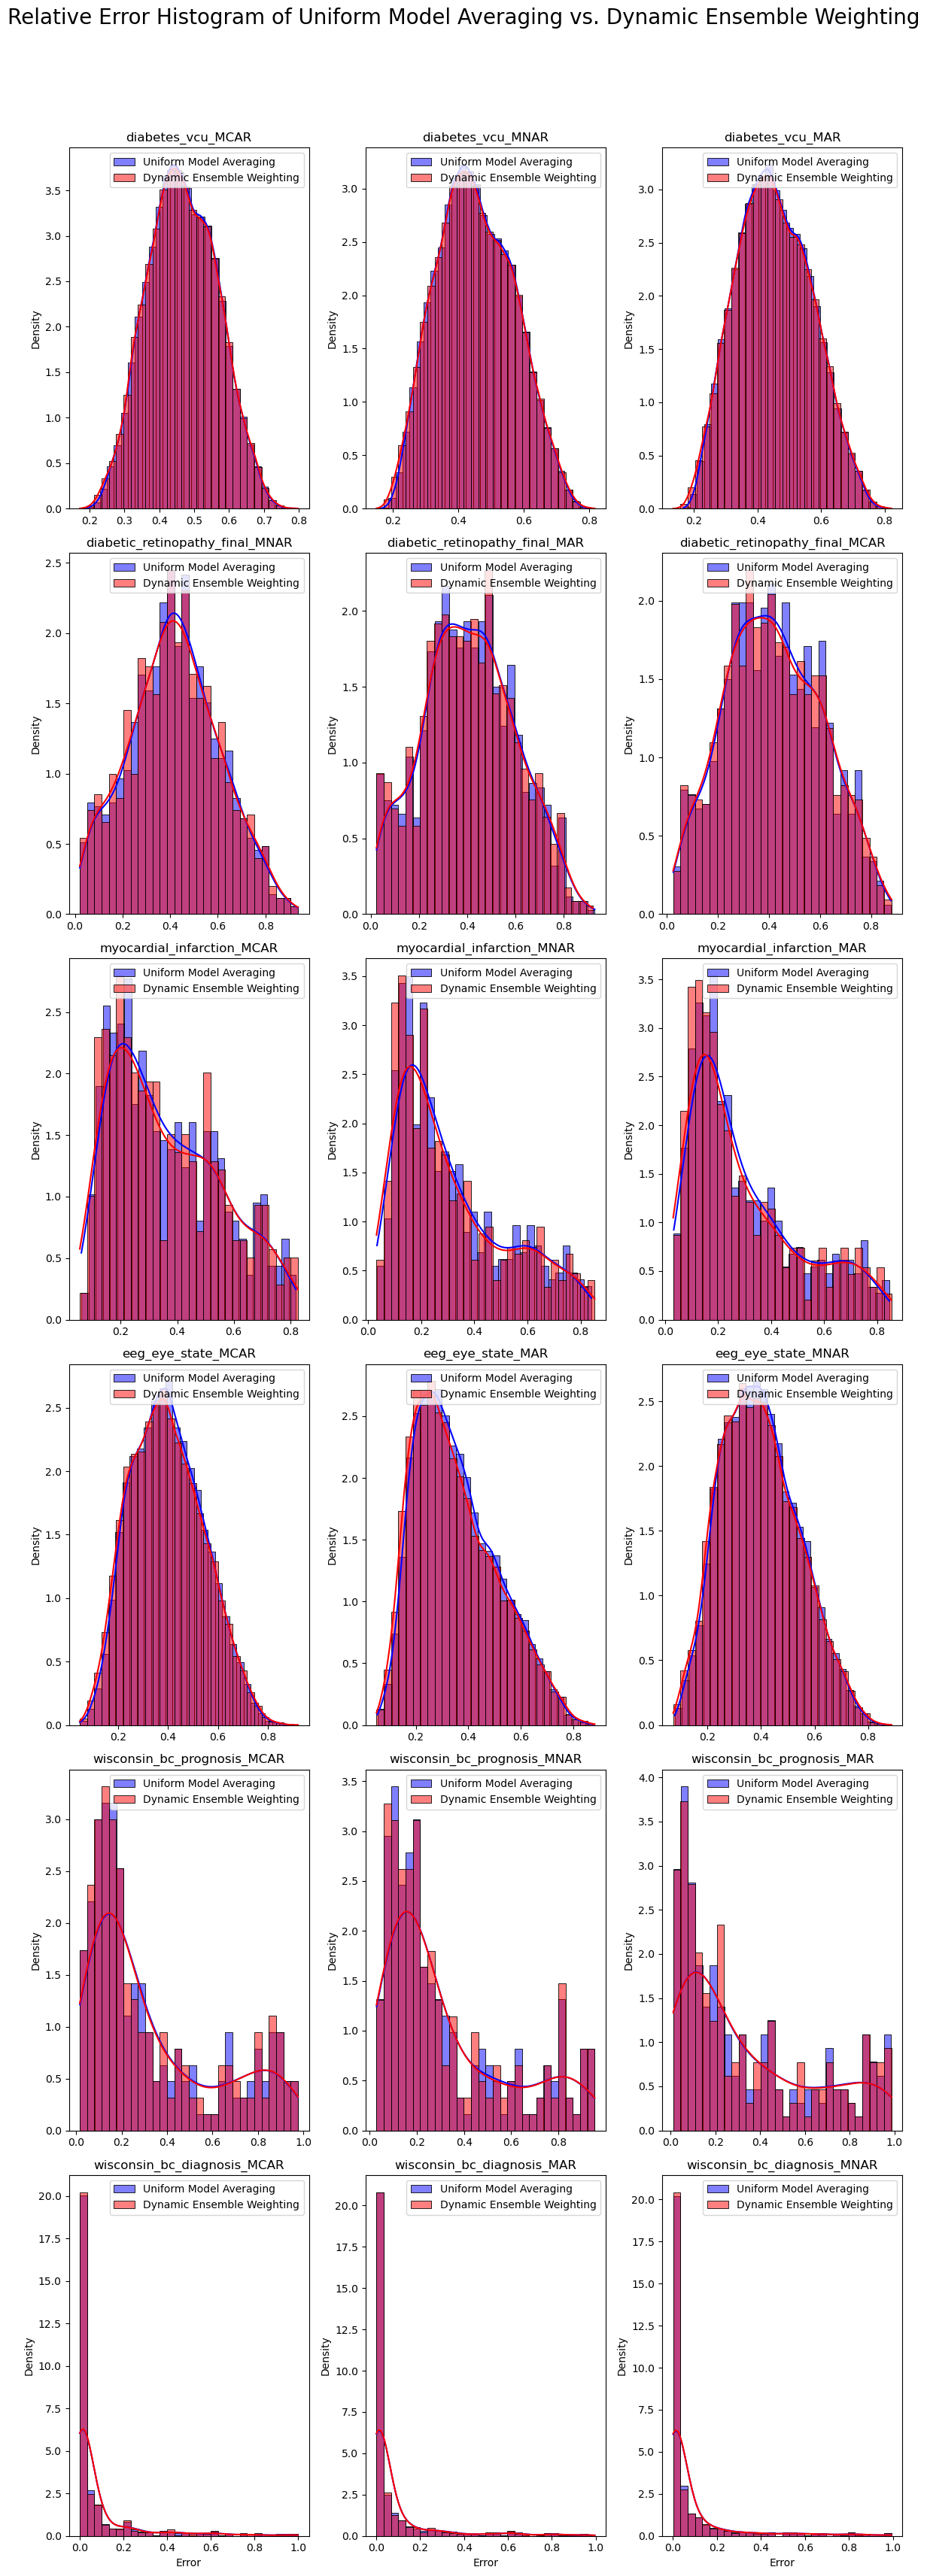

In [133]:
n_rows = len(datasets)
n_cols = 3
missing_types = ['MAR','MCAR','MNAR']
#Create a figure with subplots. Each dataset will have a row, and each missing type will have a column.
fig, axs = plt.subplots(len(datasets), len(missing_types), figsize=(12, 6 * len(datasets)))

# plt.figure(figsize=(24,16))
for idx, dataset in enumerate(datasets):
     # Initialize a column index
    col_idx = 0
    base_path = 'Experiment_Trials/'+dataset+'/'
    # Loop through each main experiment type directory
    for exp_type_dir in os.listdir(base_path):
        # Construct the path to the experiment type directory
        exp_type_path = os.path.join(base_path, exp_type_dir)
        # print(exp_type_path)
        if os.path.isdir(exp_type_path):
            # Now loop through each timestamped directory within the experiment type directory
            for timestamp_dir in os.listdir(exp_type_path):
                # Construct the path to the timestamped directory
                timestamp_path = os.path.join(exp_type_path, timestamp_dir)

                if os.path.isdir(timestamp_path) and timestamp_dir.startswith(('MAR','MCAR','MNAR')):
                    # Construct the path to the errors_0.csv file
                    errors_file_path = os.path.join(timestamp_path, 'results', 'errors_0.csv')
                    if os.path.exists(errors_file_path):
                        # Read the errors into a dataframe
                        errors_df = selecting_UMA__DEW(errors_file_path)
                        # print(errors_df)
                        # Plot the boxplot for the errors                    
                        sns.histplot(errors_df['UMA'], ax=axs[idx, col_idx], color="blue", label='Uniform Model Averaging', kde=True, stat="density", bins=30)
                        sns.histplot(errors_df['DEW'], ax=axs[idx, col_idx], color="red", label='Dynamic Ensemble Weighting', kde=True, stat="density", bins=30)
                    # Add legends to each subplot
                        axs[idx, col_idx].legend()
                        # Inside your loop where you plot, clear the x-axis labels for all but the last row
                        if idx < len(datasets) - 1:
                            axs[idx, col_idx].set_xlabel('')
                        else:
                            axs[idx, col_idx].set_xlabel('Error')
                        axs[idx, col_idx].set_title(f"{dataset}_{exp_type_dir.split('_')[0]}")

                        
        col_idx+=1
        
# fig.text(0.5, 0.04, 'Error Types', ha='center', va='center', fontsize=12)  # Adjust the position and fontsize as needed
# # Set overall figure title
plt.suptitle('Relative Error Histogram of Uniform Model Averaging vs. Dynamic Ensemble Weighting',fontsize=20)

# # Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# # Show the plot
plt.show()
    
    

In [236]:
# Define your color and marker mappings based on legend_handles
colors = {
    'BayesianRidge_XGBClf': 'red',
    'XGBR_XFBClf': 'green',
    'RF_XGBClf': 'blue',
    'KNN_XFBClf': 'orange',
    'BayesianRidge_RF': 'yellow',
    'XGBR_RF': 'purple',
    'RF_RF': 'pink',
    'KNN_RF': 'gray',
    'UMA': 'c',
    'DEW': 'm'
}
markers = {
    'BayesianRidge_XGBClf': 'X',
    'XGBR_XFBClf': 'X',
    'RF_XGBClf': 'X',
    'KNN_XFBClf': 'X',
    'BayesianRidge_RF': 'X',
    'XGBR_RF': 'X',
    'RF_RF': 'X',
    'KNN_RF': 'X',
    'UMA': 'o',
    'DEW': 'o'
}

/var/folders/cw/n3c11rb162191jttykhpd_d00000gn/T/ipykernel_92082/2904079221.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/cw/n3c11rb162191jttykhpd_d00000gn/T/ipykernel_92082/2904079221.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/cw/n3c11rb162191jttykhpd_d00000gn/T/ipykernel_92082/2904079221.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/cw/n3c11rb162191jttykhpd_d00000gn/T/ipykernel_92082/2904079221.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/var/folders/cw/n3c11rb162191jttykhpd_d00000gn/T/ipykernel_92082/2904079221.py:50: UserWarning: 

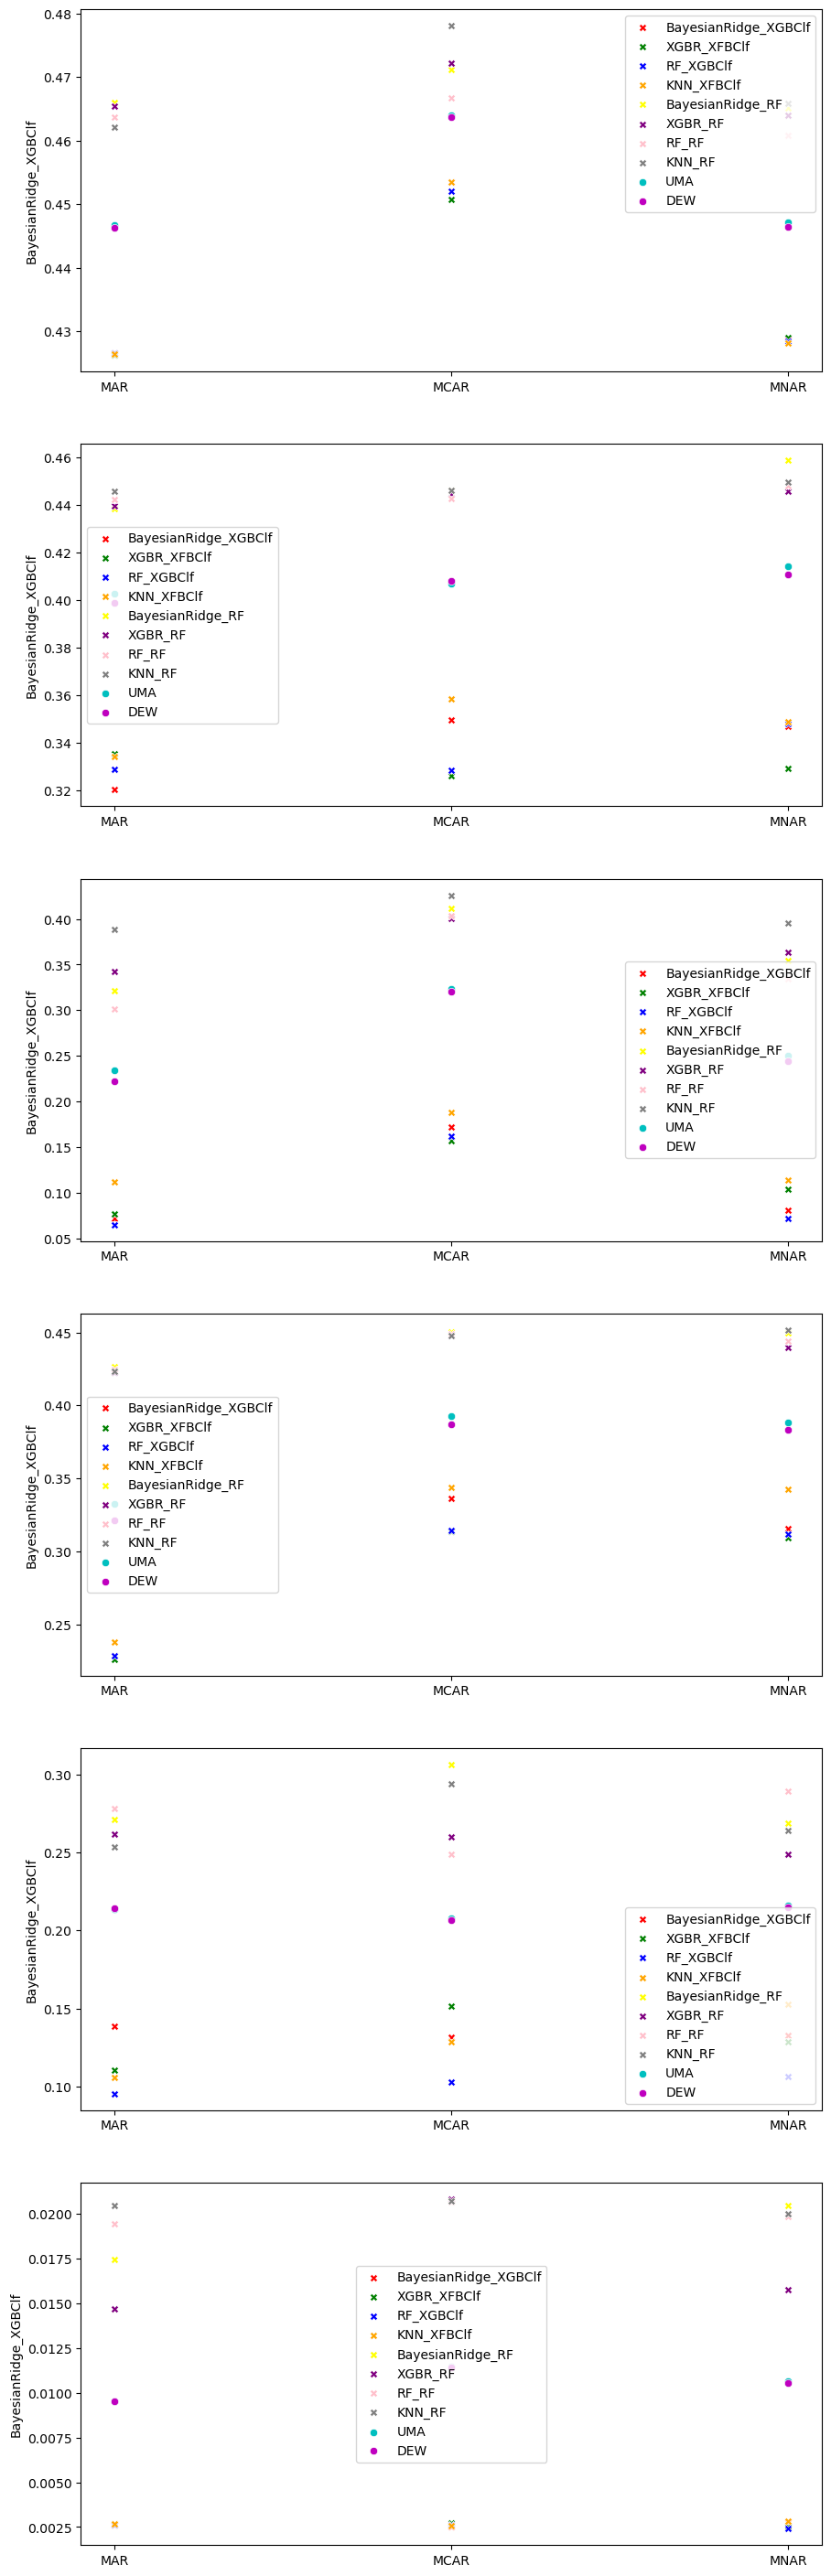

In [240]:
n_rows = len(datasets)
n_cols = 3
missing_types = ['MAR','MCAR','MNAR']
#Create a figure with subplots. Each dataset will have a row, and each missing type will have a column.
fig, axs = plt.subplots(n_rows, 1, figsize=(12, 6 * len(datasets)))
# Adjust subplot parameters to make room for the legend
plt.subplots_adjust(right=0.8)
# Create custom legend handles, use different markers for 'UMA' and 'DEW'
legend_handles = [mlines.Line2D([], [], color='red', marker='X', linestyle='None', label='BayesianRidge_XGBClf'),
                    mlines.Line2D([], [], color='green', marker='X', linestyle='None', label='XGBR_XFBClf'),
                    mlines.Line2D([], [], color='blue', marker='X', linestyle='None', label='RF_XGBClf'),
                    mlines.Line2D([], [], color='orange', marker='X', linestyle='None', label='KNN_XFBClf'),
                    mlines.Line2D([], [], color='yellow', marker='X', linestyle='None', label='BayesianRidge_RF'),
                    mlines.Line2D([], [], color='purple', marker='X', linestyle='None', label='XGBR_RF'),
                    mlines.Line2D([], [], color='pink', marker='X', linestyle='None', label='RF_RF'),
                    mlines.Line2D([], [], color='gray', marker='X', linestyle='None', label='KNN_RF'),
                    mlines.Line2D([], [], color='c', marker='o', linestyle='None', label='UMA'), 
                    mlines.Line2D([], [], color='m', marker='o', linestyle='None', label='DEW')]
for idx, dataset in enumerate(datasets):
    base_path = 'Experiment_Trials/'+dataset+'/'
    # Loop through each main experiment type directory
    types_df= pd.DataFrame(index=['MAR','MCAR','MNAR'],columns=['BayesianRidge_XGBClf','XGBR_XFBClf','RF_XGBClf','KNN_XFBClf','BayesianRidge_RF','XGBR_RF','RF_RF','KNN_RF','UMA','DEW'])
    for exp_type_dir in os.listdir(base_path):
        # Construct the path to the experiment type directory
        exp_type_path = os.path.join(base_path, exp_type_dir)
        # print(exp_type_path)
        if os.path.isdir(exp_type_path):
            # Now loop through each timestamped directory within the experiment type directory
            for timestamp_dir in os.listdir(exp_type_path):
                # Construct the path to the timestamped directory
                timestamp_path = os.path.join(exp_type_path, timestamp_dir)

                if os.path.isdir(timestamp_path) and timestamp_dir.startswith(('MAR','MCAR','MNAR')):
                    # Construct the path to the errors_0.csv file
                    errors_file_path = os.path.join(timestamp_path, 'results', 'errors_0.csv')
                    if os.path.exists(errors_file_path):
                        # Read the errors into a dataframe
                        errors_arr = convert_ds_new(errors_file_path)
                        #add erros_arr to types_df
                        missing_type = exp_type_dir.split('_')[0]
                        types_df.loc[missing_type]=errors_arr
                        
    #plot each point in types_df before next generation
    # print(types_df)
    # sns.scatterplot(data=types_df, ax=axs[idx],palette=colors, markers=markers)
    # Plot each column with the specified color and marker
    for col in types_df.columns:
        sns.scatterplot(x=types_df.index, y=types_df[col], ax=axs[idx], color=colors[col], marker=markers[col], label=col)
    # Adjust x-axis labels to be closer
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f"{dataset}")
    # Create a legend with the custom handles
    ax.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
# Adjust subplot parameters to make room for the legend
plt.subplots_adjust(right=0.8)    
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# Define your color and marker mappings based on legend_handles

